In [3]:
# Dependencies
import json
import requests
import os
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from oc_key import oc_key
from oc_key import g_key

gmaps.configure(api_key=g_key)


In [4]:
# Load city list csv
city_list_toload = "../Resources/weather_city_final.csv"

city_list_df = pd.read_csv(city_list_toload)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01
...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01


In [5]:
lats = city_list_df["Lat"].tolist()
longs = city_list_df["Lng"].tolist()
#lats, longs
latlongpair = zip(lats,longs)
latlongpair

In [6]:
# NEXT 5 Cells only used while testing my queries to the API - not needed in final

#latitude = 42.331427
#longitude = -83.045754

In [7]:
# Set the url for the Open Charge Map
#query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=500&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latitude}&longitude={longitude}&key={oc_key}"
#query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&verbose=false&compact=true&latitude={latitude}&longitude={longitude}&key={oc_key}"


# Example url from API doc
#url = "https://api.openchargemap.io/v3/poi/?output=json&countrycode=US&maxresults=10&compact=true&verbose=false"

#print(query_url)


In [8]:
#charge_data = requests.get(query_url)
#print(charge_data.status_code)


In [9]:
#charge_json = charge_data.json()

#json.dumps(charge_json[0], indent=2)

In [10]:
#print(len(charge_json))

In [11]:
# list to capture station count per city
station_count = []

# Loop through each city and get a count of how many electric charge stations within 50 miles of center lat/long
for latlongpair in latlongpair:
    query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=3000&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latlongpair[0]}&longitude={latlongpair[1]}&key={oc_key}"
    charge_data = requests.get(query_url)
    charge_json = charge_data.json()
    station_count.append(len(charge_json))


In [12]:
station_count

[363,
 45,
 52,
 129,
 1168,
 232,
 235,
 1164,
 41,
 144,
 271,
 1187,
 368,
 393,
 191,
 142,
 126,
 134,
 235,
 103,
 86,
 486,
 180,
 453,
 612,
 6,
 76,
 148,
 0,
 47,
 368,
 25,
 3,
 599,
 384,
 164,
 619,
 660,
 106,
 123,
 527,
 503,
 91,
 841,
 2887,
 55,
 690,
 1626,
 700,
 2964,
 217,
 1935,
 546,
 89,
 570,
 2763,
 1747,
 1919,
 615,
 2838,
 2964,
 474,
 455,
 376,
 1116,
 793,
 143,
 569,
 35,
 34,
 1091,
 67,
 269,
 270,
 270]

In [13]:
# Add station count to the data frame and kick out a CSV
city_list_df["Number of Stations"] = station_count
city_list_df.to_csv('Results/station_count_by_city.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,129
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1168
...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1091
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,270


In [15]:
# Get stations per 1k pop data
pop1k = city_list_df["Population"]/1000

city_list_df["Stations per 1k Population"] = pop1k/station_count
city_list_df.to_csv('Results/station_count_per1kpop.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363,1.326218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45,10.335822
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52,5.400942
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,129,2.412969
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1168,0.224098
...,...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1091,0.563428
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67,5.815642
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269,1.125502
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,270,1.540819


In [24]:
# Get stations per mile using area of 50-mile radius circle, 7,854 miles
permile = city_list_df["Number of Stations"]

city_list_df["Stations per mile"] = (city_list_df["Number of Stations"])/7854
city_list_df.to_csv('Results/station_count_permile.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363,1.326218,0.046218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45,10.335822,0.005730
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52,5.400942,0.006621
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,129,2.412969,0.016425
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1168,0.224098,0.148714
...,...,...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1091,0.563428,0.138910
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67,5.815642,0.008531
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269,1.125502,0.034250
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,270,1.540819,0.034377


In [25]:
# Set up a heat map for charging stations
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)

In [26]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationct, dissipating=False, max_intensity=750, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
# Set up a heat map for charging stations per 1k pop
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationper1k = city_list_df["Stations per 1k Population"].astype(float)

In [28]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationper1k, dissipating=False, max_intensity=10, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

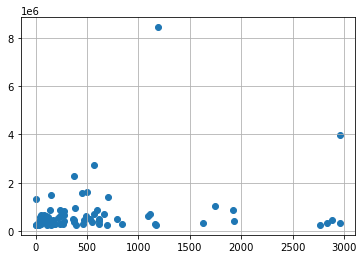

In [50]:
stations = city_list_df["Number of Stations"].tolist()
latitudes = city_list_df["Lat"].tolist()
population = city_list_df["Population"].tolist()
stations_mile = city_list_df["Stations per mile"].tolist()
maxtemp = city_list_df["Max Temp"].tolist()

plt.scatter(stations, population)
#plt.title("Stations by latitude")
plt.grid(True)
plt.show()

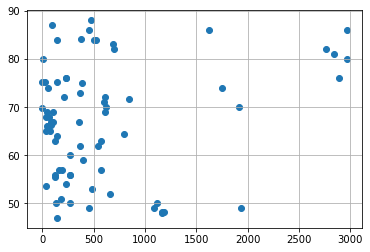

In [49]:
plt.scatter(stations, maxtemp)
#plt.title("Stations by latitude")
plt.grid(True)
plt.show()

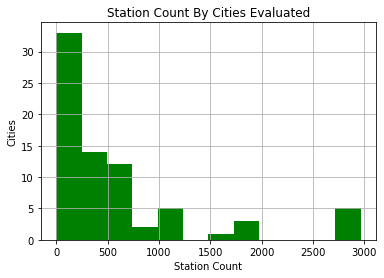

In [30]:
plt.hist(stations, bins=12, color='green')
plt.ylabel("Cities")
plt.xlabel("Station Count")
plt.title("Station Count By Cities Evaluated")
plt.grid(True)
plt.savefig("Results/station_ct_by_cities.png")
plt.show()


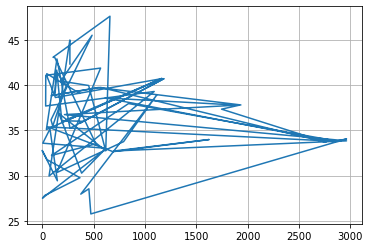

In [31]:
plt.plot(city_list_df["Number of Stations"], city_list_df["Lat"])
plt.grid(True)
plt.show()

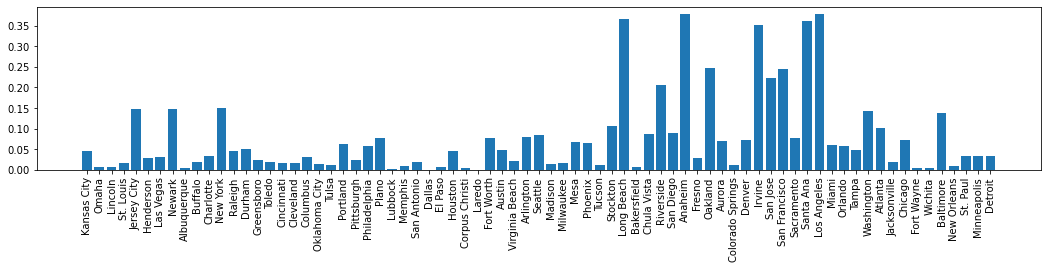

In [41]:

plt.figure(figsize=(18,3))
plt.bar(city_list_df["Clean_City"], city_list_df["Stations per mile"])
plt.xticks(rotation="vertical")
plt.savefig("Results/stations_per_mile.png")
plt.show()

In [43]:
station_corr = city_list_df.corr()
station_corr.unstack().sort_values()

Lat                         Min Temp                     -0.758202
Min Temp                    Lat                          -0.758202
Lat                         Max Temp                     -0.753409
Max Temp                    Lat                          -0.753409
                            Lng                          -0.518897
                                                            ...   
Lat                         Lat                           1.000000
Stations per 1k Population  Stations per 1k Population    1.000000
Stations per mile           Stations per mile             1.000000
Number of Stations          Stations per mile             1.000000
Stations per mile           Number of Stations            1.000000
Length: 64, dtype: float64

In [ ]:
# THIS WAS A BAD IDEA - poi.json is WAY too big...


#filepath = os.path.join("Resources", "poi.json")
#with open(filepath, encoding="utf8") as jsonfile:
#    open_charge = json.load(jsonfile)



In [ ]:
# THIS WAS ALL WORKING WITH THE FULL DATA SET BUT THERE'S a CHAR ISSUE SOMEWHERE

#js = [json.loads(line) for line in open(filepath, encoding="utf8")]
#for item in js:
    #name = item.get("name")
    #businessID = item.get("business_id")
    


In [ ]:
#filepath = os.path.join("Resources", "poi.json")

#print(json.dumps(filepath, encoding="utf8", indent=4, sort_keys=True))